In [ ]:
!pip install uproot awkward lz4 xxhash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 KB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.2/583.2 KB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.8 MB/s eta 0:00:00


In [ ]:
import uproot
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = uproot.open("/content/drive/MyDrive/PRA3024/Week2/B2HHH_MagnetDown.root:DecayTree")
#From our file, we have to extract the DecayTree 
f.keys()
f.show()



name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

In [ ]:
H1_Ptot=f.arrays("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))",library="pd")
H2_Ptot=f.arrays("sqrt((H2_PX**2)+(H2_PY**2)+(H2_PZ**2))",library="pd")
H3_Ptot=f.arrays("sqrt((H3_PX**2)+(H3_PY**2)+(H3_PZ**2))",library="pd")

In [ ]:
from numpy import *

import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

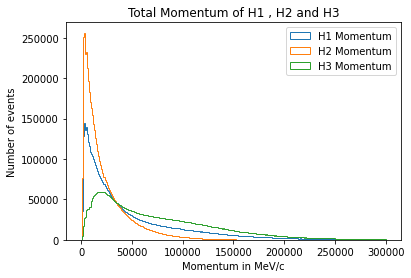

In [ ]:
bins = "300"
histRange = (0.0, 300000.0)

plt.hist(H1_Ptot, bins=int(bins), histtype='step', range=histRange,label="H1 Momentum")
plt.hist(H2_Ptot, bins=int(bins), histtype='step', range=histRange,label="H2 Momentum")
plt.hist(H3_Ptot, bins=int(bins), histtype='step', range=histRange,label="H3 Momentum")

plt.title("Total Momentum of H1 , H2 and H3")
plt.xlabel("Momentum in MeV/c")
plt.ylabel("Number of events")
plt.legend()
plt.show


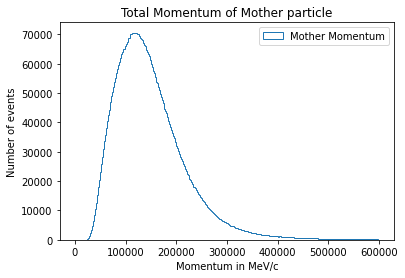

In [ ]:
h1px=f["H1_PX"].array(library="np")
h2px=f["H2_PX"].array(library="np")
h3px=f["H3_PX"].array(library="np")

h1py=f["H1_PY"].array(library="np")
h2py=f["H2_PY"].array(library="np")
h3py=f["H3_PY"].array(library="np")

h1pz=f["H1_PZ"].array(library="np")
h2pz=f["H2_PZ"].array(library="np")
h3pz=f["H3_PZ"].array(library="np")

#Total momentum of mother particle
MPtot=sqrt((h1px+h2px+h3px)**2 + (h1py+h2py+h3py)**2 + (h1pz+h2pz+h3pz)**2)


#plot hist
histRange2=(0.0,600000.0)
plt.hist(MPtot, bins=int(bins), histtype='step', range =histRange2 , label="Mother Momentum")
plt.title("Total Momentum of Mother particle")
plt.xlabel("Momentum in MeV/c")
plt.ylabel("Number of events")
plt.legend()
plt.show()


(5135823,)
(5135823,)
(5135823,)
(5135823,)


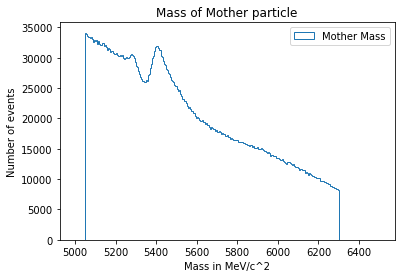

In [ ]:
kaonMass=493.677 #in MeV/c^2


#Energy of each daughter
H1E= sqrt(kaonMass**2 + (sqrt((h1px**2)+(h1py**2)+(h1pz**2)))**2)
H2E= sqrt(kaonMass**2 + (sqrt((h2px**2)+(h2py**2)+(h2pz**2)))**2)
H3E= sqrt(kaonMass**2 + (sqrt((h3px**2)+(h3py**2)+(h3pz**2)))**2)

#Energy of Mother particle(sum of daughhters)
ME=H1E+H2E+H3E


print(H1E.shape)
print(H2E.shape)
print(H3E.shape)
print(MPtot.shape)

#Mass of Mother particle (sqrt(E^2-p^2))
Mmass=sqrt(ME**2 - MPtot**2)


#plot hist
histRange3=(5000.0,6500.0)
plt.hist(Mmass, bins=int(bins), histtype='step', range =histRange3 , label="Mother Mass")
plt.title("Mass of Mother particle")
plt.xlabel("Mass in MeV/c^2")
plt.ylabel("Number of events")
plt.legend()
plt.show()

###Does this match what we would expect from theory?
#The theory suggests the b meson has mass of approx. 5279 MeV/c^2
#Our result peaks between approx. 5050-5400. This is somewhat in line with the expected prediction, but far from being accurate.

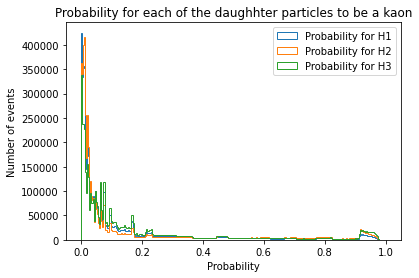

In [ ]:
###Make plots of H1/H2/H3 _ProbK on one plot

h1probk=f["H1_ProbK"].array(library="np")
h2probk=f["H2_ProbK"].array(library="np")
h3probk=f["H3_ProbK"].array(library="np")

#plot hist
histRange4=(0.0, 1.0)

plt.hist(h1probk,bins=int(bins),range = histRange4,histtype='step',label="Probability for H1")
plt.hist(h2probk,bins=int(bins),range = histRange4,histtype='step',label="Probability for H2")
plt.hist(h3probk,bins=int(bins),range = histRange4,histtype='step',label="Probability for H3")

plt.title("Probability for each of the daughhter particles to be a kaon")
plt.xlabel("Probability")
plt.ylabel("Number of events")
plt.legend()
plt.show()

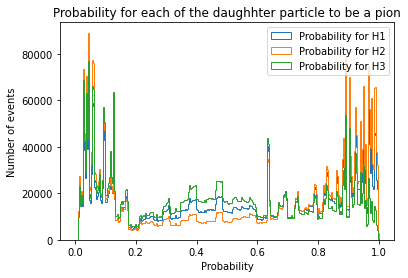

In [ ]:
#Make plots of H1/H2/H3 _ProbPi on one plot

h1probpi=f["H1_ProbPi"].array(library="np")
h2probpi=f["H2_ProbPi"].array(library="np")
h3probpi=f["H3_ProbPi"].array(library="np")

#plot hist
plt.hist(h1probpi,bins=int(bins),range = histRange4,histtype='step',label="Probability for H1")
plt.hist(h2probpi,bins=int(bins),range = histRange4,histtype='step',label="Probability for H2")
plt.hist(h3probpi,bins=int(bins),range = histRange4,histtype='step',label="Probability for H3")

plt.title("Probability for each of the daughhter particle to be a pion")
plt.xlabel("Probability")
plt.ylabel("Number of events")
plt.legend()
plt.show()


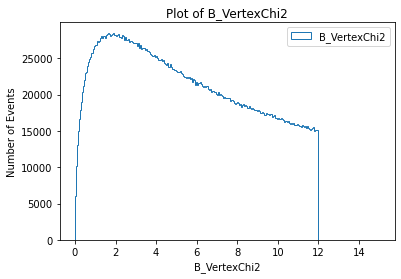

In [ ]:
#For all our particles, make a plot of the B_VertexChi2

bvertchi2=f["B_VertexChi2"].array(library="np")

#plot hist
histRange5=(0.0, 15)
plt.hist(bvertchi2,bins=int(bins),range=histRange5, histtype='step',label="B_VertexChi2")
plt.title("Plot of B_VertexChi2")
plt.xlabel("B_VertexChi2")
plt.ylabel("Number of Events")
plt.legend()
plt.show()

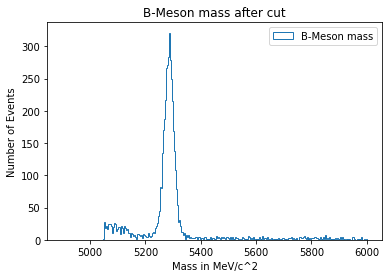

In [ ]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
#This is not a good choice of selection - you should make your own :)
#selection=("H1_ProbPi>0.9&H2_ProbPi>0.9&H3_ProbPi>0.9&!H1_isMuon&H2_isElectron&H3_isElephant")

cut_tree=f.arrays(cut="(H1_ProbK>0.75)&(H2_ProbK>0.75)& (H3_ProbK>0.75)&(H1_isMuon==0)&(H2_isMuon==0)&(H3_isMuon==0)",library="np")

h1pxcut=cut_tree["H1_PX"]
h1pycut=cut_tree["H1_PY"]
h1pzcut=cut_tree["H1_PZ"]

h2pxcut=cut_tree["H2_PX"]
h2pycut=cut_tree["H2_PY"]
h2pzcut=cut_tree["H2_PZ"]

h3pxcut=cut_tree["H3_PX"]
h3pycut=cut_tree["H3_PY"]
h3pzcut=cut_tree["H3_PZ"]


#Energy after cut

H1Ecut= sqrt(kaonMass**2 + (sqrt((h1pxcut**2)+(h1pycut**2)+(h1pzcut**2)))**2)
H2Ecut= sqrt(kaonMass**2 + (sqrt((h2pxcut**2)+(h2pycut**2)+(h2pzcut**2)))**2)
H3Ecut= sqrt(kaonMass**2 + (sqrt((h3pxcut**2)+(h3pycut**2)+(h3pzcut**2)))**2)


#Energy of mother part after cut
ME=H1Ecut+H2Ecut+H3Ecut


#Total momentum after cut
MPtotcut=sqrt((h1pxcut+h2pxcut+h3pxcut)**2 + (h1pycut+h2pycut+h3pycut)**2 + (h1pzcut+h2pzcut+h3pzcut)**2)

#mass after cut
Mmasscut=sqrt((ME**2) -(MPtotcut**2))


#plot hist
histRange6=(4900.0, 6000.0)
plt.hist(Mmasscut,bins=int(bins),range=histRange6, histtype='step',label="B-Meson mass")
plt.title("B-Meson mass after cut")
plt.xlabel("Mass in MeV/c^2")
plt.ylabel("Number of Events")
plt.legend()
plt.show()


#This result is much closer to the theoretical value fot the B-meson's mass

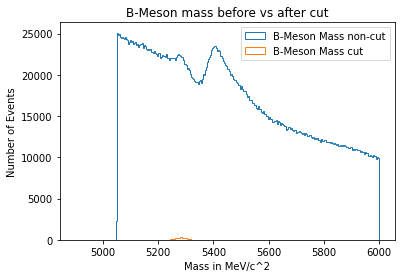

In [ ]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)

#plot hist mass before vs after cut
plt.hist(Mmass, bins=int(bins), histtype='step', range =histRange6 , label="B-Meson Mass non-cut")
plt.hist(Mmasscut,bins=int(bins),range=histRange6, histtype='step',label="B-Meson Mass cut")
plt.title("B-Meson mass before vs after cut")
plt.xlabel("Mass in MeV/c^2")
plt.ylabel("Number of Events")
plt.legend()
plt.show()

#What do you notice about your histogram now?
#Due to the cut, the obtained value is much closer to the theoritical value. 
#but the number of events is much lower. This makes the graph hard to read.

How do we count the number of events?

In [ ]:
!pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


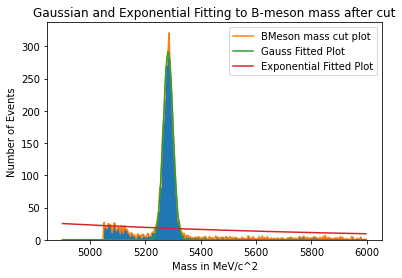

In [ ]:
#fitting models inspired from https://lmfit.github.io/lmfit-py/builtin_models.html
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel #for signal
from lmfit.models import ExponentialModel  #for background

#Initialise Gaussian model
Gmodel=GaussianModel(independent_vars=['x'], prefix='GM_',nan_policy='raise')

#Initialise Exponential model
Emodel=ExponentialModel(independent_vars=['x'], prefix='EM_',nan_policy='raise')

#data from hist
y,x,range=plt.hist(Mmasscut,bins=int(bins),range=histRange6)

#parameters
parametersG=Gmodel.make_params(GM_amplitude=2000,GM_center=5280,GM_sigma=4)
parametersE=Emodel.make_params(EM_amplitude=2000,EM_decay=5280,EM_sigma=4.0)

#fitting
GaussFitting=Gmodel.fit(y,parametersG,x=x[:-1])
ExponentialFitting=Emodel.fit(y,parametersE,x=x[:-1])

plt.plot(x[:-1],y,  label="BMeson mass cut plot")
plt.plot(x[:-1],GaussFitting.best_fit, label="Gauss Fitted Plot")
plt.plot(x[:-1],ExponentialFitting.best_fit, label="Exponential Fitted Plot")
plt.title("Gaussian and Exponential Fitting to B-meson mass after cut")
plt.xlabel("Mass in MeV/c^2")
plt.ylabel("Number of Events")
plt.legend()
plt.show()

Counting

In [ ]:
#Here do your calculation of the final result